In [76]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#read the data file
data = pd.read_csv("../Dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,3.829016,121.511658,69.822539,20.589378,79.404145,31.973187,0.475295,33.231865,0.352332
std,3.368318,33.174359,21.795081,15.929434,115.075850,7.872294,0.334665,11.748085,0.478006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,20.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,24.000000,32.000000,0.375500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,126.250000,36.525000,0.629250,41.000000,1.000000
max,17.000000,300.000000,250.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [79]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [80]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())



<Axes: >

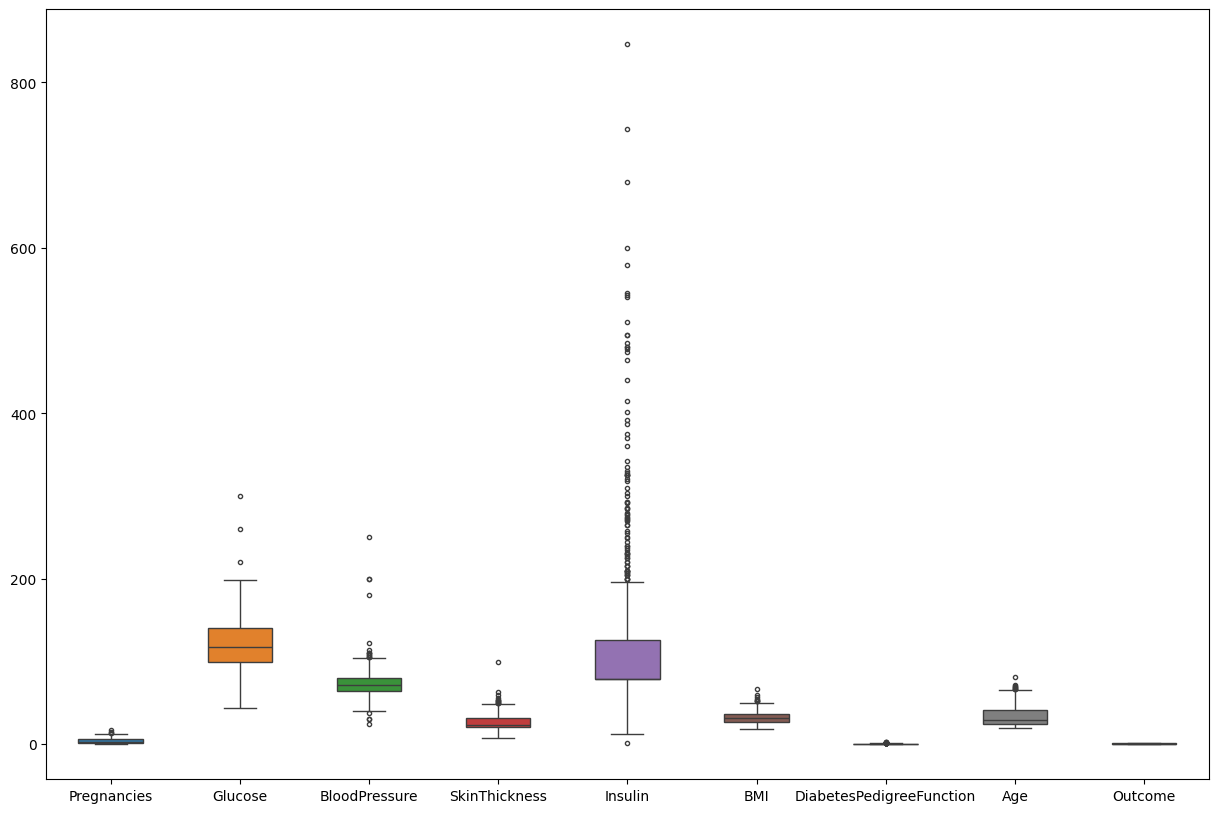

In [81]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [82]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.404145,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.404145,26.6,0.351,31,0
2,8,183.0,64.0,20.589378,79.404145,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [83]:
#segregate the dependent and independent variable
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [84]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((579, 8), (193, 8))

In [85]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('../Model/standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [86]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [87]:
X_train_scaled

array([[-0.54663789, -0.46047119, -0.7215182 , ..., -1.06428616,
         1.17209041, -0.95692072],
       [-0.24776788,  0.16183547,  0.24774684, ..., -1.6760528 ,
        -0.612924  ,  1.81756853],
       [ 1.24658217,  0.0996048 ,  0.85353748, ...,  0.858409  ,
        -0.3770575 ,  1.31311594],
       ...,
       [ 0.05110213, -0.89608584, -0.539781  , ..., -1.1516814 ,
        -0.96235586, -1.04099615],
       [ 2.1431922 , -1.17612384,  0.00543058, ..., -0.36512428,
        -0.51974217,  0.1360599 ],
       [ 0.34997214,  0.41075813,  0.4900631 , ..., -0.09227832,
         0.47031476,  2.99462458]])

In [88]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [89]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}


In [90]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [91]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [92]:
clf.best_score_

0.76167574107683

let's see how well our model performs on the test data set.

In [93]:
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test,y_pred)
accuracy

In [94]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[116,  10],
       [ 27,  40]], dtype=int64)

In [95]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [96]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8082901554404145

In [97]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9206349206349206

In [98]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8111888111888111

In [99]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.862453531598513

In [100]:
import pickle
file = open('../Model/modelForPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()